In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Practice with anonymized data 

In [2]:
df = pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
sc_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
df_feat = pd.DataFrame(sc_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
X=df_feat
y=df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
pred = knn.predict(X_test)

In [12]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[146   9]
 [  9 136]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.94      0.94      0.94       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [13]:
error_rate=[]

for i in range(1,300):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

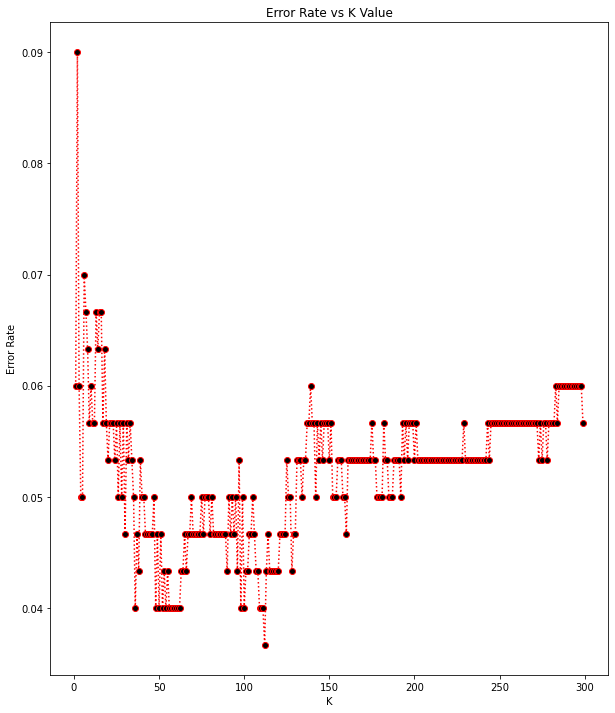

In [14]:
plt.figure(figsize=(10,12))
plt.plot(range(1,300),error_rate,'r:',marker='o',markerfacecolor='k')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
knn2 = KNeighborsClassifier(n_neighbors=100)
knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

In [16]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[148   7]
 [  5 140]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       155
           1       0.95      0.97      0.96       145

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## 2nd anonymized practice set

In [17]:
df=pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [18]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
sc_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(sc_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


not standardized

In [19]:
X=df.drop('TARGET CLASS',axis=1)
y=df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [20]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [21]:
error_rate=[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

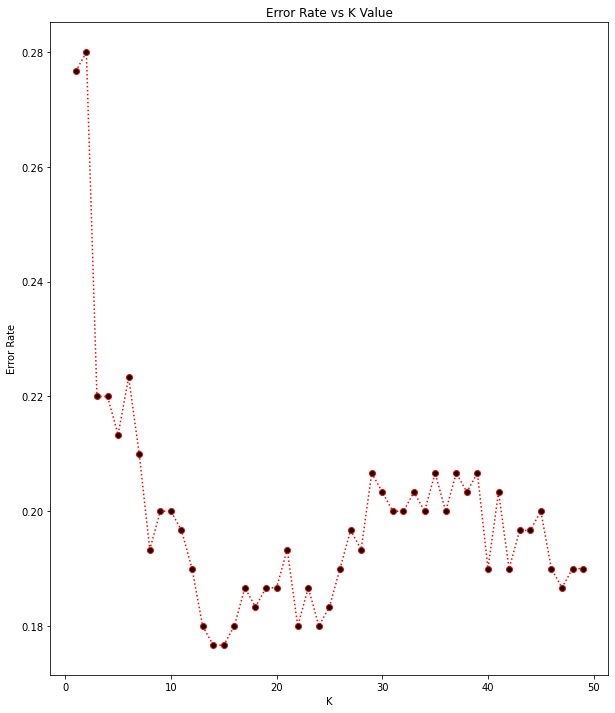

In [22]:
plt.figure(figsize=(10,12))
plt.plot(range(1,50),error_rate,'r:',marker='o',markerfacecolor='k')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#go with neighbors=25

In [26]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [27]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[121  29]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.81      0.84      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



standardized

In [28]:
XS=df_feat
yS=df['TARGET CLASS']

X_trainS, X_testS, y_trainS, y_testS = train_test_split(XS,yS, test_size=0.3)

In [29]:
error_rateS=[]

for i in range(1,100):
    knnS = KNeighborsClassifier(n_neighbors=i)
    knnS.fit(X_trainS,y_trainS)
    pred_iS=knnS.predict(X_testS)
    error_rateS.append(np.mean(pred_iS != y_testS))
    

Text(0, 0.5, 'Error Rate')

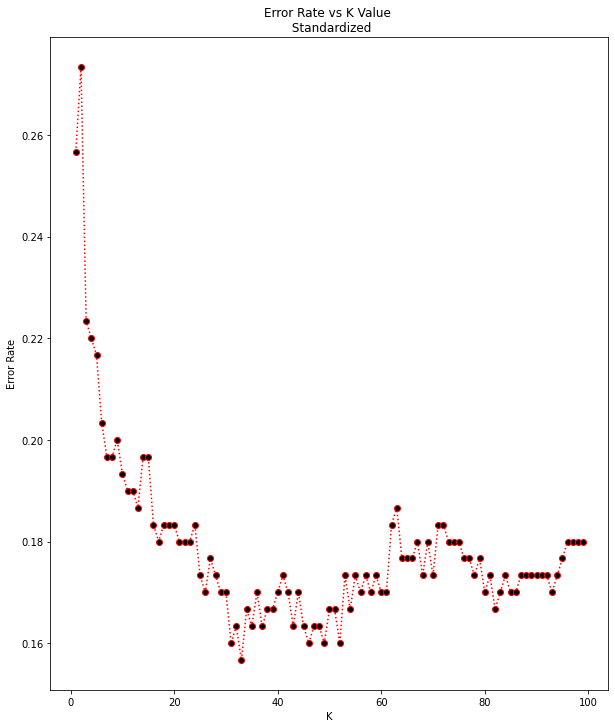

In [30]:
plt.figure(figsize=(10,12))
plt.plot(range(1,100),error_rateS,'r:',marker='o',markerfacecolor='k')
plt.title('Error Rate vs K Value \n Standardized')
plt.xlabel('K')
plt.ylabel('Error Rate')

#go with neighbors=40

In [31]:
knnS = KNeighborsClassifier(n_neighbors=30)
knnS.fit(X_trainS,y_trainS)
predS = knnS.predict(X_testS)

In [32]:
print(confusion_matrix(y_testS,predS))
print(classification_report(y_testS,predS))

[[122  22]
 [ 29 127]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       144
           1       0.85      0.81      0.83       156

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Breast Cancer

In [95]:
df = pd.read_csv('breastCancer.csv',index_col='id')

In [44]:
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))
sc_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(sc_features,columns=df.columns[:-1])

ValueError: could not convert string to float: '?'

someone put a ? in this data file

find it

In [96]:
lst=df.columns.tolist()
for x in lst:
    print(df[x].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: size_uniformity, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: shape_uniformity, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: epithelial_size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64
1     443
10     61
3      44
2      

bare nucleoli column has ? replace the ? with NaN

In [105]:
df['bare_nucleoli'].values[df['bare_nucleoli']=='?']=np.nan

look at all ? values

In [104]:
df.isna().sum() #16
df.count() #699

print(16/699*100)

2.28898426323319


drop rows of info that have ?  

In [106]:
df2=df[~df['bare_nucleoli'].isna()]

In [107]:
scaler = StandardScaler()
scaler.fit(df2.drop('class',axis=1))
sc_features = scaler.transform(df2.drop('class',axis=1))
df2_feat = pd.DataFrame(sc_features,columns=df2.columns[:-1])

In [112]:
X=df2_feat
y=df2['class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [114]:
error_rate=[]

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

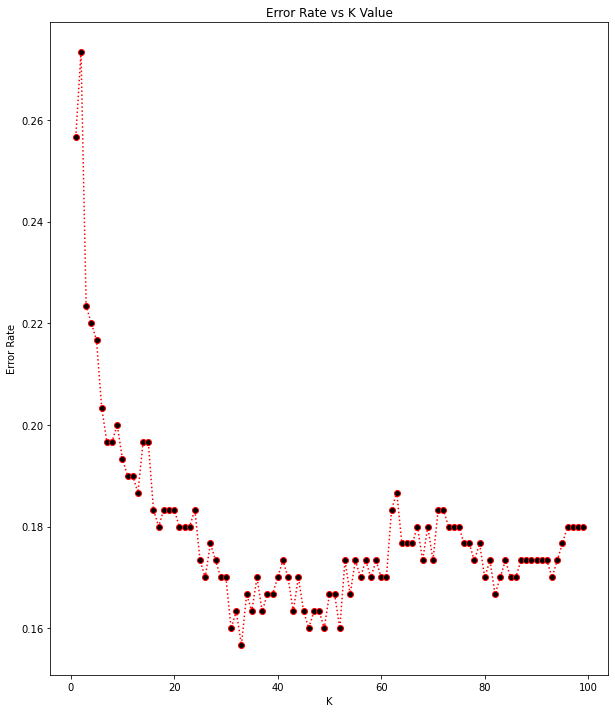

In [115]:
plt.figure(figsize=(10,12))
plt.plot(range(1,100),error_rateS,'r:',marker='o',markerfacecolor='k')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#k=28

In [123]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[131   4]
 [  2  68]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       135
           4       0.94      0.97      0.96        70

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

